In [2]:
import matplotlib as mpl
import matplotlib.colors as col
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
import copy

In [27]:
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
e = ['#ffffff', '#009FD7',  '#E30010',  '#f39200', '#528EA5',  '#004C64', '#E84932',  '#74BCBF',  '#fed630',  '#75D0F4',  '#EBA289']
cmap = col.LinearSegmentedColormap.from_list('', [col.hex2color(color) for color in e], N=len(e))




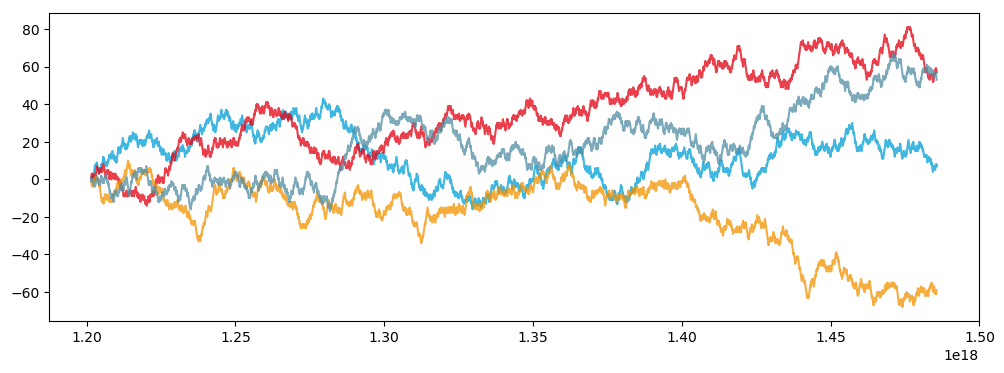

In [13]:
fig, ax = plt.subplots(figsize=(12,4))

dates = pd.date_range('2008-01-29', '2017-01-29')
N = 5
for color in e[:N]: #[4:8]:
    y = pd.Series(np.power(-1, np.random.binomial(1, .5, dates.size)).cumsum(), index=dates)
    ax.plot(y.index, y, color=color, label=color, alpha=.75)
    
plt.show()

In [14]:
class Schelling:
    def __init__(self, N, empty_ratio, similarity_threshold, n_iterations, races=2):
        self.N = N
        self.races = races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.households = {}
        self.map = []
        self.houses_by_race = {}
        
        def populate(self):
            prob = [self.empty_ratio] + [(1 - self.empty_ratio)/(n) for i in range(n)]
            
            self.map = np.random.choice(self.races+1, size=(self.N+1)**2, replace=True, p=prob).reshape(N+1, N+1)

            self.empty_houses = np.argwhere(self.map==0)

            self.houses_by_race = {i: np.argwhere(self.map==i) for i in np.arange(1, self.races+1)}

            self.households = {tuple(k) : self.map[k[0], k[1]] for k in np.argwhere(self.map>0)}
            
            
        def is_satisfied(self, x):
            
            if x not in self.households.keys():
                satisfied = True
            
            elif x[0] in [0, self.N+1] or x[1] in [0, self.N+1]:
                satisfied = True
                
            else:
                same = len(np.where(np.isin(self.map[x[0]-1:x[0]+2, x[1]-1:x[1]+2],
                                    [self.map[x[0],x[1]], 0]))[0])-1
                
                if same >= 9*self.similarity_threshold:
                    satisfied = True
                else: 
                    satisfied = False
            
            return satisfied

        def update(self):
            pass
        
        def move_to_empty(self, x, y):
            pass
        
        def plot(self):
            pass
        
        

## Schelling model

1. Populate a $N \times N$ grid with $n$ colors
2. Let randomly drawn cells move if they are **unsatisfied,** i.e. they have more than $k$ neighbors of not the same color.
3. Repeat for $M$ iterations


### How to color a $N \times N$ grid with $n$ colors. 

This cell populates a $N \times N$ grid with $n$ colors.  Tracks the *empty* houses, i.e. those colored white, and the households

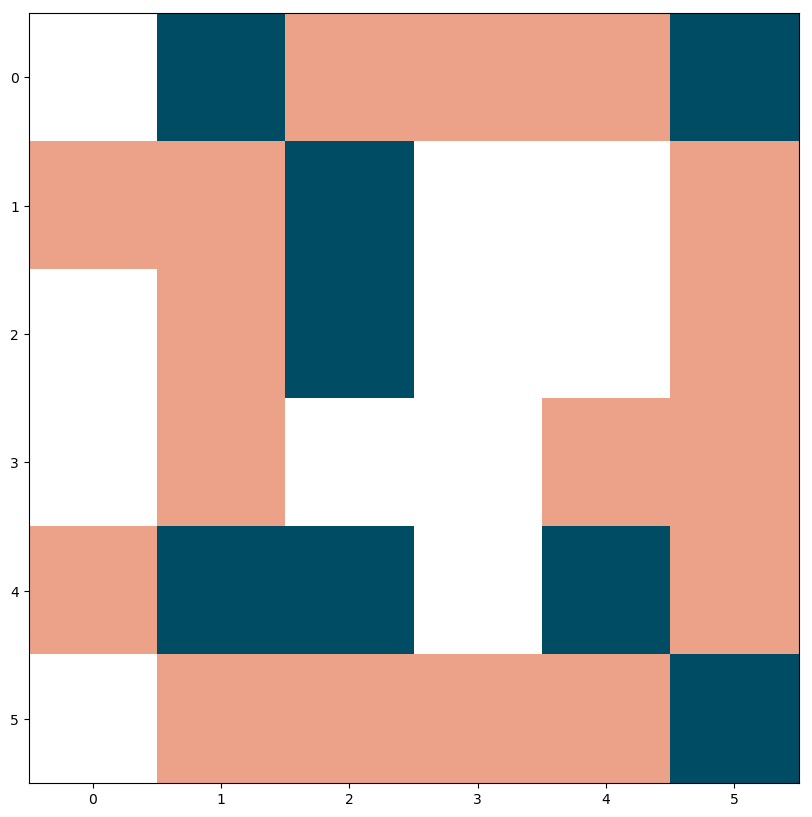

In [55]:
N = 5
n = 2
empty = .25
similarity_threshold = .667

def populate():
    grid = np.random.choice(n+1, size=(N+1)**2, replace=True, p=[empty] + [(1 - empty)/(n) for i in range(n)]).reshape(N+1, N+1)

    empty_houses = np.argwhere(grid==0)

    houses_by_race = {i: np.argwhere(grid==i) for i in np.arange(1, n+1)}

    households = {tuple(k) : grid[k[0], k[1]] for k in np.argwhere(grid>0)}
    
    return grid, empty_houses, houses_by_race, households

grid, empty_houses, houses_by_race, households, = populate()

grid
fig, ax = plt.subplots(figsize=(10,10))

plt.imshow(grid, cmap=cmap);

plt.show()

In [230]:
[0,1] in empty_houses

True

In [35]:
def is_satisfied(x):
    
    if x not in households.keys():
        satisfied = True
        
    elif x[0] in [0, N] or x[1] in [0, N]:
        satisfied = True
    else:
        same = len(np.where(np.isin(grid[x[0]-1:x[0]+2, x[1]-1:x[1]+2],
                                    [grid[x[0],x[1]], 0]))[0])-1
        if same >= 9*similarity_threshold:
            satisfied = True
        else: 
            satisfied = False
    return satisfied


In [56]:
satisfied = np.array([is_satisfied(tuple(x)) for x in np.argwhere(grid>-1)]).reshape(N+1, N+1)

satisfied

array([[ True,  True,  True,  True,  True,  True],
       [ True, False, False,  True,  True,  True],
       [ True, False, False,  True,  True,  True],
       [ True, False,  True,  True,  True,  True],
       [ True, False, False,  True, False,  True],
       [ True,  True,  True,  True,  True,  True]], dtype=bool)

In [59]:
unsatisfied = np.argwhere(satisfied==False)


    

In [58]:
empty_houses

array([[0, 0],
       [1, 3],
       [1, 4],
       [2, 0],
       [2, 3],
       [2, 4],
       [3, 0],
       [3, 2],
       [3, 3],
       [4, 3],
       [5, 0]])

In [54]:
empty_houses = np.delete(empty_houses, np.s_[:2], 0)

empty_houses

array([[1, 0],
       [1, 3],
       [1, 5],
       [2, 2],
       [2, 3]])

In [ ]:
for house in unsatisfied:
    
    if len(empty_houses) == 0:
        break
    else:
        np.random.ran
        
        
    

In [62]:
np.random.permutation(empty_houses)[:len(unsatisfied)]

array([[2, 4],
       [5, 0],
       [2, 0],
       [3, 2],
       [4, 3],
       [1, 3],
       [2, 3],
       [1, 4]])

In [61]:
np.random.permutation(unsatisfied)

array([[4, 2],
       [3, 1],
       [4, 1],
       [4, 4],
       [2, 2],
       [1, 2],
       [1, 1],
       [2, 1]])

In [ ]:
def update(self):
    
    available = np.random.permutation(np.concatenate([empty_houses, unsatisfied])
    
    #move unsatisfied to empty recolor map
    
    #move the empty to the now vacant

In [66]:
for k in unsatisfied:
    grid[k[0], k[1]] = households[tuple(k)]

In [69]:
test = np.concatenate([empty_houses, unsatisfied] , )

In [70]:
test

array([[0, 0],
       [1, 3],
       [1, 4],
       [2, 0],
       [2, 3],
       [2, 4],
       [3, 0],
       [3, 2],
       [3, 3],
       [4, 3],
       [5, 0],
       [1, 1],
       [1, 2],
       [2, 1],
       [2, 2],
       [3, 1],
       [4, 1],
       [4, 2],
       [4, 4]])